# Using Predictive Analysis To Predict Melbourne House Price  

By Niladri Ghosh

## 1. Identify Problem

Real Estate has became one of the main places to put your investment in recent times. With the current instability in the market it has became too risky to invest in stock markets, gold prices constanly going down and goverment not considering crypocurrency as a serious option. That being said, owing a property seems to be a viable option to put your money in. So with this motivation we need to analyze what fectors leads to the price of a property in an area, we'll be predicting house prices in Melbourne, Australia.

### 1.1 Expected Outcome

Given house price data from Domain.com.au (and other sources) provides various features of a particular property like number of rooms, address, suburb ,etc. Since this is a __regression problem__, our __final output would be the price of the house estimated by our model__.

### 1.2 Objective

Since many features in our data is categorical value, we need to find appropriate techniques to convert them into integers, as our model only inputs numerical values and finally predict house prices. In machine learning this is a regression problem.

> Thus, the goal is to estimate the price of various houses provided the different unique features of the property. To acheive this we have used machine learning regression methods to fit a function that can predict the continuos values (price) for the new inputs.

### 1.3 Identify Data Sources

The [Melbourne House Price](https://www.kaggle.com/anthonypino/melbourne-housing-market?select=Melbourne_housing_FULL.csv) dataset is available at Kaggle by [Tony Pino](https://www.kaggle.com/anthonypino). The dataset contains 34,857 rows of data and 21 columns (20 features and 1 taget).

* The 5th column provides the price of the house.
* Columns 1-4 and 6-21 provides various details for the given house.

__Getting Started : Load libraries and set options__

In [1]:
# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

# ignore warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# display all columns
pd.set_option('display.max_columns', None)

__Load Dataset__

First load the supplied CSV file using Pandas read_csv function.

In [2]:
# read data
df_primary = pd.read_csv('data/data_full.csv')

In [3]:
# create copy of dataframe
df = df_primary.copy()

__Inspecting the data__

The first step is to visually inspect the new dataset. There are multiple ways to acheive this:
* The easiest way is to fetch first 5 rows is using DataFrame.head(), here df.head().
* Alternatively we can fetch the last 5 rows using DataFrame.tail(), here df.tail().

__NOTE:__ 

For both the above methods we can add a parameter inside the parenthesis '()' to specify how many rows we want to display, thus we can inspect the data.

In [4]:
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,3.0,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,4.0,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,3.0,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


In [5]:
# check shape of the given data
df.shape

(34857, 21)

We can observe here the number of 34,857 rows, each with 21 columns.

On contrary we can use use info() method provided by pandas to generate a consise summary of the data. It provides the detail about each column, number of rows, null values, the data type and the memory usage.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

There are some wrong data types. The postcode columns is float, it's a categorical value. And the following columns :

* Date column needs to be set as datetime.
* Bathroom, Car and Yearbuilt to be set as integer.
* Postcode and Propertycount to be set as categorical.

Change Postcode and Propertycount as categorical

In [7]:
#change Postcode
df['Postcode']= df['Postcode'].astype('object')

#change Propertycount
df['Propertycount']= df['Propertycount'].astype('object')

Now we analyse Bedroom2 column. 

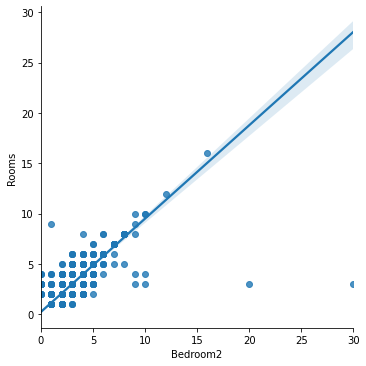

In [8]:
sns.lmplot(data= df, x='Bedroom2', y='Rooms');

We __remove__ the column __Bedroom2__, mainly for two reasons:

* The column has been scraped for number of Bedrooms, from a different source which is not reliable.
* From the above plot we can clearly see that there is a linear relation, which mean they are almost same.

In [9]:
df.drop(columns=['Bedroom2'],inplace=True)

Now we use the describe method provided by Pandas to check the in-depth statistics of our numerical values.


In [10]:
df.describe()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude
count,34857.000000,2.724700e+04,34856.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000
mean,3.031012,1.050173e+06,11.184929,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851
std,0.969933,6.414671e+05,6.788892,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169
min,1.000000,8.500000e+04,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790
25%,2.000000,6.350000e+05,6.400000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500
50%,3.000000,8.700000e+05,10.300000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800
75%,4.000000,1.295000e+06,14.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900
max,16.000000,1.120000e+07,48.100000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350


We encounter some strange values from above result, so  we carefully analyse these values:

* Bathroom contains values 0 and 12. Logically number of bathrooms would be between 1 and 7.
* BuildingArea contains 0 and miximum area of 44515 square meters which is next to impossible. 
* YearBuilt have values more than 2018, sice time of scrape is 2018 and needs to be rectified.

In [11]:
# check number of bathrooms
df['Bathroom'].value_counts()

1.0     12969
2.0     11064
3.0      2181
4.0       269
5.0        77
0.0        46
6.0        16
7.0         4
8.0         3
9.0         1
12.0        1
Name: Bathroom, dtype: int64

There are 46 houses that do not have bathroom! One possible idea, they should be old houses with a common bathroom outside, so we will consider these as accurate values. On the other hand there is a property with 12 bathrooms, which is least likely. 

We analyse houses with more than 7 bathrooms.

In [12]:
# check bathroom
df.loc[df['Bathroom']>7]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
2536,Burwood,36 Cumming St,3,h,NaN,PI,Ross,8/10/2016,11.7,3125,12.0,0.0,946.0,NaN,1950.0,Monash City Council,-37.85300,145.11290,Southern Metropolitan,5678
8251,Preston,421 Murray Rd,4,h,760000.0,PI,Barry,22/05/2016,8.8,3072,8.0,7.0,1254.0,280.0,1928.0,Darebin City Council,-37.73670,144.98950,Northern Metropolitan,14577
17472,Camberwell,1088 Toorak Rd,8,h,2200000.0,PI,Ross,8/07/2017,7.7,3124,8.0,4.0,650.0,NaN,NaN,Boroondara City Council,-37.84812,145.07414,Southern Metropolitan,8920
25717,Burwood,79 Elgar Rd,10,h,2315000.0,SP,Buxton,28/10/2017,10.4,3125,9.0,2.0,612.0,466.0,2015.0,Monash City Council,-37.84461,145.10968,Southern Metropolitan,5678
26210,Mitcham,20 Harrison St,16,h,5000000.0,S,Buxton,28/10/2017,17.2,3132,8.0,8.0,NaN,NaN,NaN,Whitehorse City Council,-37.81405,145.19891,Eastern Metropolitan,6871


We analyse houses with less than 1 BuildingArea.

In [13]:
# check buildingarea
df[df['BuildingArea']<1].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,4/03/2017,2.3,3051,1.0,1.0,215.0,0.00,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821
16540,South Melbourne,148 Cobden St,3,h,NaN,S,Marshall,24/06/2017,1.9,3205,2.0,0.0,282.0,0.01,1920.0,Port Phillip City Council,-37.83658,144.96292,Southern Metropolitan,5943
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,3/09/2017,9.7,3104,3.0,2.0,743.0,0.00,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,3/09/2017,12.1,3083,1.0,2.0,542.0,0.00,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175
20038,Heidelberg Heights,8 Thames St,3,h,NaN,SN,Miles,3/09/2017,8.8,3081,1.0,2.0,658.0,0.00,1920.0,Banyule City Council,-37.75287,145.05547,Eastern Metropolitan,2947


In [14]:
#count number of houses with less than 1 Building area
len(df[df['BuildingArea']<1])

77

In simple words these are 77 points are the results of data entry mistakes. We drop these rows.

In [15]:
# drop rows for umber of houses with less than 1 Building area (uninary operator for removing data) 
df = df[~(df['BuildingArea'] < 1)]  

Since there are missing values in the data we reset the index for dataframe.

In [16]:
df = df.reset_index()

Since BuildingArea coulumn has a maximum value of 4, clearly a wrong entry. Analze with Boxplot for outliers.

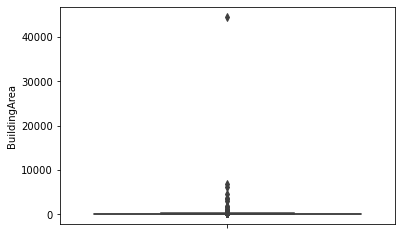

In [17]:
sns.boxplot(data= df,y='BuildingArea');

Absolutely right ,assumption was right. Further we analyse the row and rectify the data point.

In [18]:
# view the row
df[df['BuildingArea']>40000]

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
22614,22632,New Gisborne,71 Hamilton Rd,5,h,1355000.0,S,Raine,23/09/2017,48.1,3438,3.0,5.0,44500.0,44515.0,NaN,Macedon Ranges Shire Council,-37.45392,144.58864,Northern Victoria,849


The value is clearly absurd and should be 455, the data entry person must have moved two decimal points further!

In [19]:
# replace 44500.0 with 445
df['BuildingArea'].replace(44515.0, 445.15, inplace=True)

Check for duplicate values using pandas dataframe duplicated method. 

In [20]:
# check total duplicated values
df.duplicated().any()

False

We have no duplicate data.

The pandas method __dtypes.value_counts()__ provides the number of columns of each type in the dataframe.

In [21]:
df.dtypes.value_counts()

object     10
float64     9
int64       2
dtype: int64

From the above results, out of 20 columns 9 are float values, 8 are object (character values) and 1 is integer value, one integer column is index.

In [24]:
df['BuildingArea'].max()

6791.0

__Save the cleaner version of dataframe for future analysis.__

In [22]:
# save data
df.drop(columns=['index'],inplace=True)
df.to_csv('data/data_v1.csv',index=False)

> Next notebook involves removal of outliers and taking closer look at attributes. In notebook title : NB2_FeatureEngineering.